In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (21, 10)

## Exercise 3.01 ##
In this exercise we are required to test the Black-Scholes analytic solution for European option pricing. To estimate the uncertainties we used datablocking, for $N=1000$ blocks of $M=100$ experiment in each block. In the Black-Scholes model the asset price varies accord to a geometric brownian motion. We simulated the geometric brownian motion in two ways: by dividing the final time $t_f$ in $100$ time steps and by using the increment formula $100$ times, and by using the increment formula for $t=t_f$. The formula is exact, so there is no truncation error. 

In [20]:
df=pd.read_csv(r'blackScholesPricing\blackScholesPricing.csv')
df.head(10)

,nBlocks,directCall,discreteCall,directCallErr,discreteCallErr,directPut,discretePut,directPutErr,discretePutErr
0,0,15.9125,14.7442,0.000000,0.000000,5.61667,5.51861,0.000000,0.000000
1,1,14.4060,15.3376,1.506450,0.593410,5.31473,6.21600,0.301941,0.697388
2,2,15.4324,15.0414,1.345350,0.452864,4.83726,5.60605,0.508296,0.730858
3,3,15.3744,14.4098,0.953074,0.708146,4.70700,5.16205,0.382298,0.681331
4,4,14.7418,14.3464,0.972221,0.552175,4.78691,5.21179,0.306719,0.530095
5,5,14.6590,14.3394,0.798127,0.450903,4.85139,5.47910,0.258604,0.508713
6,6,14.8660,14.7940,0.705594,0.593159,4.70001,5.35554,0.265867,0.447345
7,7,15.1307,15.1962,0.665940,0.652425,4.66712,5.20477,0.232584,0.415713
8,8,15.5780,14.6276,0.738248,0.808936,4.63775,5.27116,0.207213,0.372587
9,9,15.6277,14.8212,0.662172,0.748996,4.64898,5.32794,0.185677,0.338054


In [21]:

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


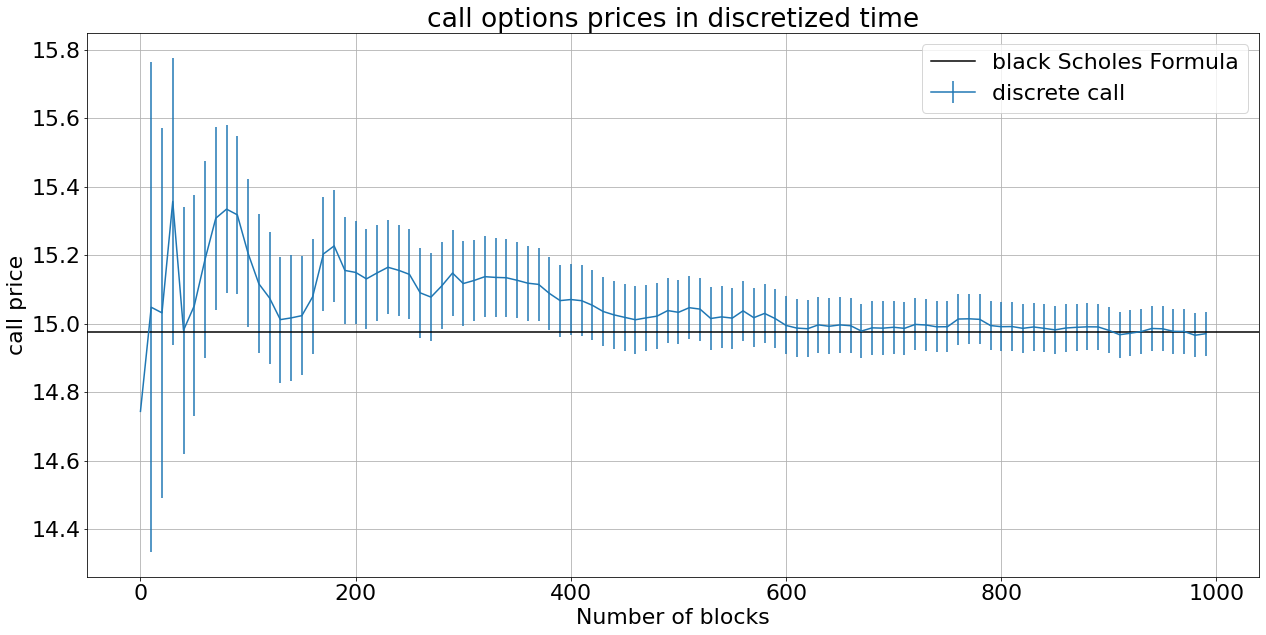

In [22]:
N=df.discreteCall.size;
plt.errorbar(x=range(N)[0::10], y=df.discreteCall[0::10], yerr=df.discreteCallErr[0::10], label='discrete call');
plt.axhline(call,color='black',label='black Scholes Formula')
plt.xlabel('Number of blocks')
plt.ylabel('call price')
plt.title('call options prices in discretized time')
plt.grid()
plt.legend();

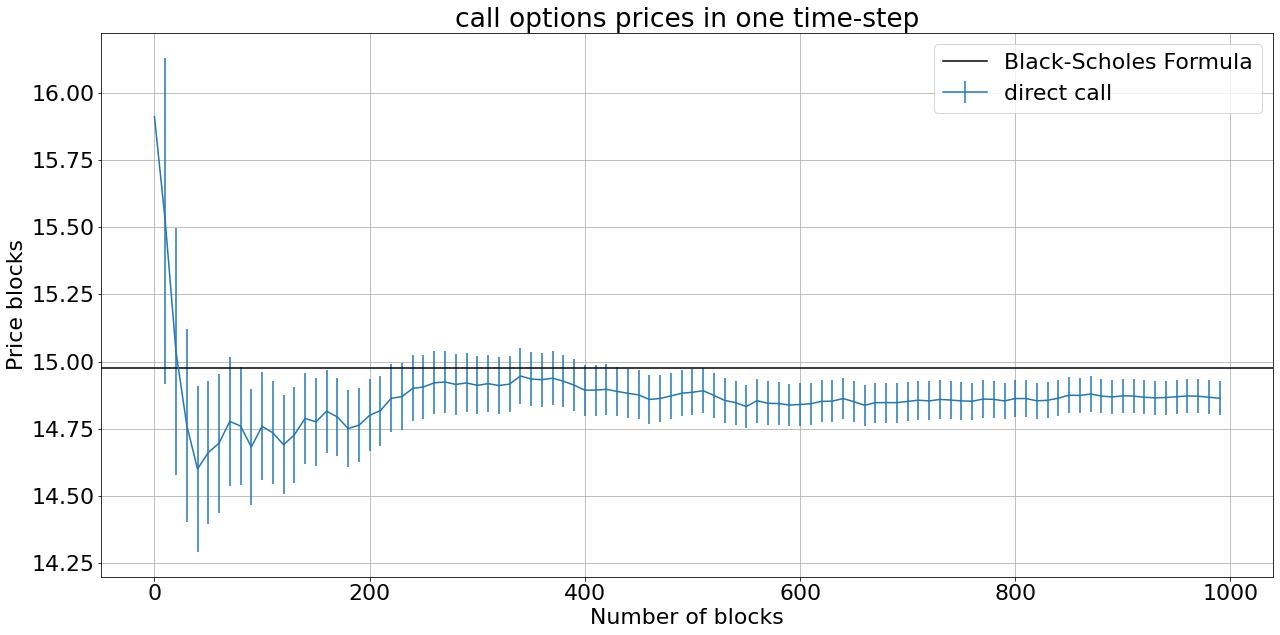

In [23]:
N=df.discreteCall.size;
plt.errorbar(x=range(N)[0::10], y=df.directCall[0::10], yerr=df.directCallErr[0::10], label='direct call');
plt.axhline(call,color='black',label='Black-Scholes Formula')
plt.xlabel('Number of blocks')
plt.ylabel('Price blocks')
plt.title('call options prices in one time-step')
plt.grid()
plt.legend();

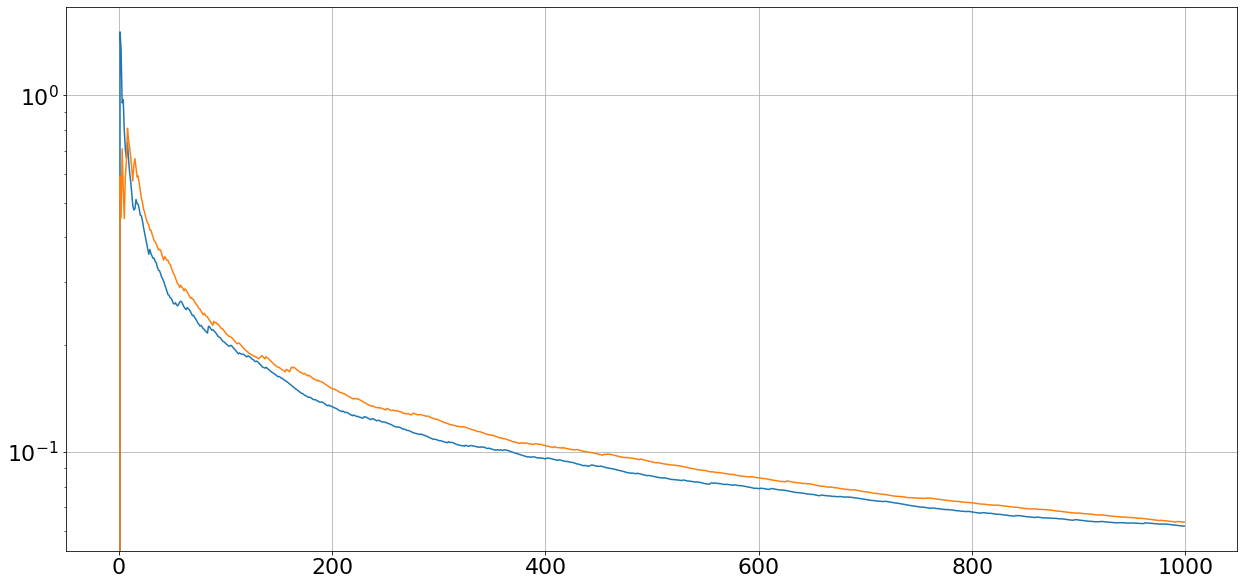

In [24]:
plt.plot(df.directCallErr)
plt.plot(df.discreteCallErr)
plt.grid()
plt.yscale('log')

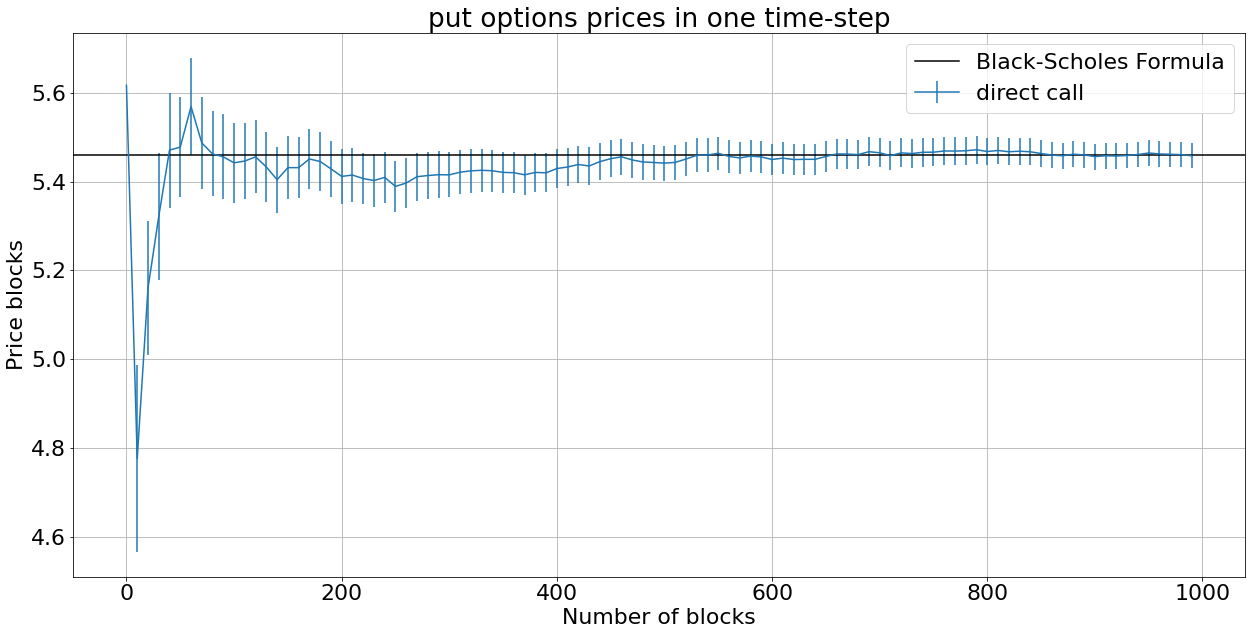

In [25]:
N=df.discreteCall.size;
plt.errorbar(x=range(N)[0::10], y=df.directPut[0::10], yerr=df.directPutErr[0::10], label='direct call');
plt.axhline(put,color='black',label='Black-Scholes Formula')
plt.xlabel('Number of blocks')
plt.ylabel('Price blocks')
plt.title('put options prices in one time-step')
plt.grid()
plt.legend();

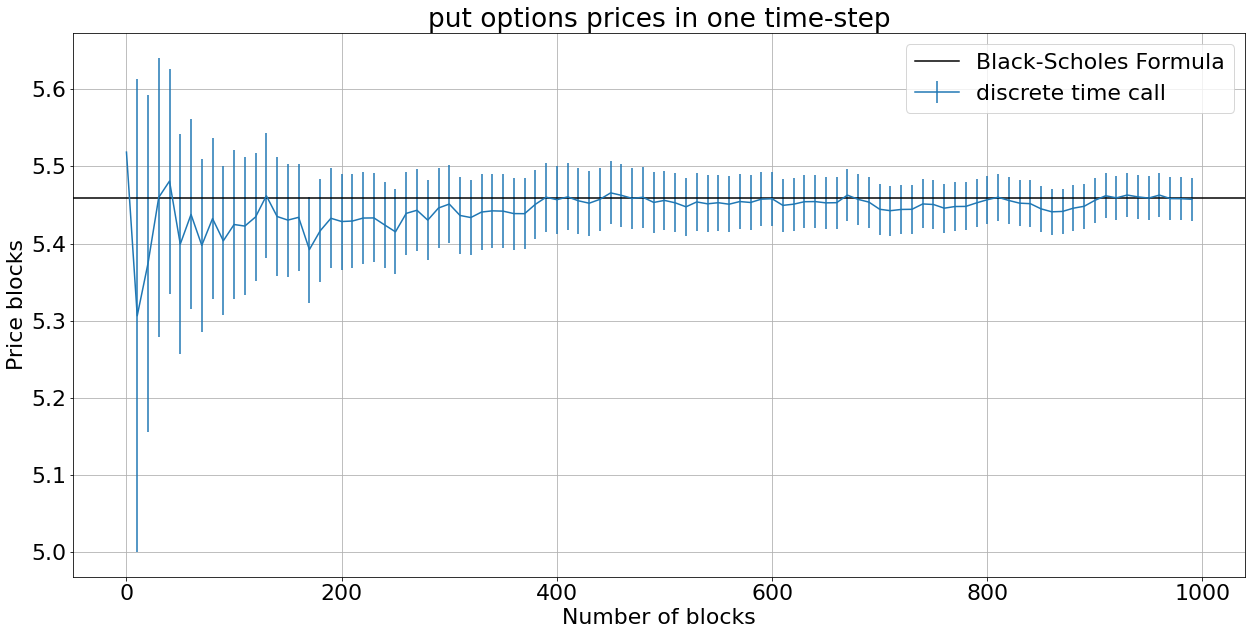

In [26]:
N=df.discreteCall.size;
plt.errorbar(x=range(N)[0::10], y=df.discretePut[0::10], yerr=df.discretePutErr[0::10], label='discrete time call');
plt.axhline(put,color='black',label='Black-Scholes Formula')
plt.xlabel('Number of blocks')
plt.ylabel('Price blocks')
plt.title('put options prices in one time-step')
plt.grid()
plt.legend();